In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as syp

In [2]:
def euler(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Euler.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximación numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """
    return x + dt*f(x,t,p)

In [3]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximación numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [4]:
def integrador_ode(m,f,x0,a,b,k,p):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integración : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    #n = len(x0)
    dt = (b-a)/k
    x = np.zeros(k+1)
    t = np.zeros(k+1)
    x[:] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[j+1] = m(f,x[j],t[j],dt,p)
    return t,x

In [5]:
def integrador_ode_condicionado(m,f,x0,a,b,k,p,v_um):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integración : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    #n = len(x0)
    dt = (b-a)/k
    x = np.zeros(k+1)
    t = np.zeros(k+1)
    x[:] = x0
    t[0] = a
    period = []
    last_trig = None
    for j in range(k):
        t[j+1] = t[j] + dt
        fn = m(f,x[j],t[j],dt,p)
        if fn > v_um:
            if last_trig:
                period.append(t[j] - last_trig)
            last_trig = t[j]
            x[j+1] = x0
        else:
            x[j+1] = fn
    if len(period):
        frec_trig = 1 / (sum(period)/len(period))
    else:
        frec_trig = 0
    return t,x,frec_trig

In [6]:
t_m = 10E-3
e_l = -65E-3
r_m = 10E6
i_e: float

In [7]:
def f_a(x, t_m, e_l, r_m, i_e):
    return (-x + e_l+ r_m * i_e) / t_m  

### A)

$$
\begin{align}
\frac{dV_m(t)}{dt} =& \frac{1}{\tau_m}\left[ E_L - V_m(t) + R_m \cdot I_e(t)\right], \qquad I_e(t) = 0 \\
=& f(V_m(t)) \\
=& -\frac{V_m(t)}{\tau_m}+\frac{E_L}{\tau_m}
\end{align}
$$

$$
\frac{dV_m(t)}{dt} \rightarrow 0
$$

$$
\tau_m = 10 ms \\
E_L = -65mV\\
R_m = 10M\Omega \\
$$

$$
\begin{align}
V_m(t)=&E_L\\
=&-65mV
\end{align}
$$

In [8]:
i_e = 0
n = 100
x = np.linspace(0.001,e_l*1.15,n)

In [9]:
x_punto = f_a(x, t_m, e_l, r_m, i_e)

In [10]:
fix_x = e_l
fix_y = 0

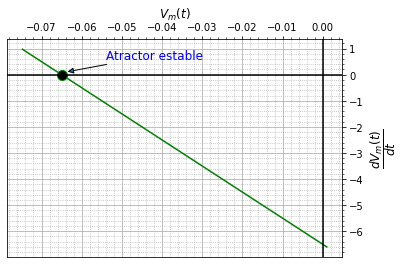

In [11]:
plt.plot(x, x_punto, 'g', fix_x, fix_y, 'ko', ms=10, mec='g')
plt.grid()
plt.gca().minorticks_on()
plt.grid(b=True, which='minor', linestyle=':')

plt.axhline(color='black')
plt.axvline(color='black')
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().yaxis.set_ticks_position('right')
plt.xlabel('$V_m(t)$', size='large')
plt.gca().xaxis.set_label_position('top')
plt.ylabel('$\dfrac{dV_m(t)}{dt}$', size='large')
plt.gca().yaxis.set_label_position('right')

plt.gca().annotate('Atractor estable',
    xy=(fix_x + 0.001, fix_y + 0.1), arrowprops=dict(arrowstyle='-|>'), xytext=(40, 10), 
        textcoords='offset pixels', horizontalalignment='left', verticalalignment='bottom', 
        color='b', size='large')
#plt.text(-0.062, 0.2, 'Atractor estable', ha='left', va='bottom', color='b', size='large')

plt.savefig("informe/figuras/ej_a.pdf", format="pdf", bbox_inches="tight")
plt.show()

### B)

$$
\begin{align}
\frac{dV_m(t)}{dt} =& \frac{1}{\tau_m}\left[ E_L - V_m(t) + R_m \cdot I_e(t)\right], \qquad I_e(t) = cte \\
=& -\frac{V_m(t)}{\tau_m}+\frac{E_L+R_m\cdot I_e}{\tau_m}
\end{align}
$$

$$
\frac{dV_m(t)}{dt} \rightarrow 0
$$

$$
\tau_m = 10 ms \\
E_L = -65mV\\
R_m = 10M\Omega \\
I_e = 2nA
$$

$$
\begin{align}
V_m(t)=&E_L+R_m\cdot I_e\\
=&-65mV + 10M\Omega \cdot 2nA \\
=& -45mV
\end{align}
$$

In [12]:
i_e = 2E-9
n = 100
x = np.linspace(0.001,e_l,n)

In [13]:
x_punto = f_a(x, t_m, e_l, r_m, i_e)

In [14]:
fix_x = e_l + r_m * i_e
fix_y = 0

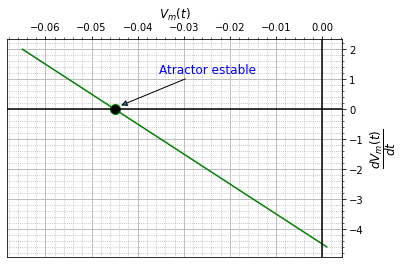

In [15]:
plt.plot(x, x_punto, 'g', fix_x, fix_y, 'ko', ms=10, mec='g')
plt.grid()
plt.gca().minorticks_on()
plt.grid(b=True, which='minor', linestyle=':')

plt.axhline(color='black')
plt.axvline(color='black')
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().yaxis.set_ticks_position('right')
plt.xlabel('$V_m(t)$', size='large')
plt.gca().xaxis.set_label_position('top')
plt.ylabel('$\dfrac{dV_m(t)}{dt}$', size='large')
plt.gca().yaxis.set_label_position('right')

plt.gca().annotate('Atractor estable',
    xy=(fix_x + 0.001, fix_y + 0.1), arrowprops=dict(arrowstyle='-|>'), xytext=(40, 30), 
        textcoords='offset pixels', horizontalalignment='left', verticalalignment='bottom', 
        color='b', size='large')

#plt.text(-0.042, 0.2, 'Atractor\nestable', ha='left', va='bottom', color='b', size='large')
plt.savefig("informe/figuras/ej_b.pdf", format="pdf", bbox_inches="tight")

plt.show()

### C)

$$
I_e = I, \qquad cte
$$

$$
\begin{align}
U(t) =& V_m(t)- E_L -R_m \cdot I \\
\Rightarrow \frac{dU(t)}{dt} =& \frac{dV_m(t)}{dt} - \frac{d}{dt}(E_L+R_M\cdot I) \\
=& \frac{dV_m(t)}{dt}\\
\Rightarrow \frac{dU(t)}{dt} =& -\frac{U(t)}{\tau_m}\\
U(t) =& U(0)\ e^{(-t/\tau_m)}, \qquad U(0) = V_m(0)-E_L-R_m\cdot I\\
V_m(t)-E_L-R_m\cdot I =& U(0) \ e^{-t/\tau_m}\\
\Rightarrow V_m(t) =& V_m(0)\ e^{-t/\tau_m} +E_L+R_m\cdot I
\end{align}
$$

### D)

In [16]:
i_e = 2E-9
u_0 = -65E-3 - (e_l) - r_m * i_e
n = 100
t = np.linspace(0, 200E-3, n)

In [17]:
def v_m(t, e_l, r_m, i_e, t_m):
    return e_l + r_m * i_e + u_0 * np.exp(-t/t_m)

In [18]:
vm_t = v_m(t, e_l, r_m, i_e, t_m)

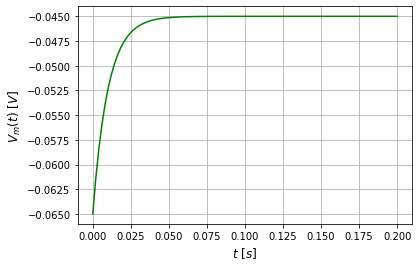

In [19]:
plt.plot(t, vm_t, 'g')
plt.grid()

plt.xlabel('$t\ [s]$', size='large')
plt.ylabel('$V_m(t)\ [V]$', size='large')

plt.savefig("informe/figuras/ej_d.pdf", format="pdf", bbox_inches="tight")

plt.show()

### E)

In [20]:
def f(x, t, p):
    return p[0] * x + p[1]

In [21]:
x = np.array([-0.065])
p = (-1/t_m, (e_l + r_m *i_e)/t_m)

In [22]:
a = 0
b = 0.2
k = int((b-a)//0.05E-3)

In [23]:
t_4,x_4 = integrador_ode(rk4, f, x, a, b, k, p)

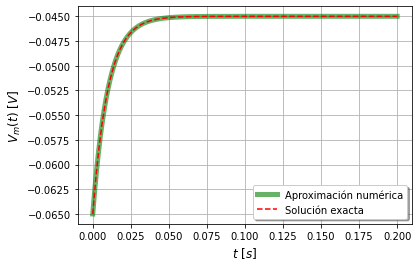

In [24]:
plt.plot(t_4,x_4, 'g', linewidth=5, alpha=0.6)
plt.plot(t, vm_t, 'r--')
plt.legend(['Aproximación numérica', 'Solución exacta'], shadow=True)

plt.grid()

plt.xlabel('$t\ [s]$', size='large')
plt.ylabel('$V_m(t)\ [V]$', size='large')

plt.savefig("informe/figuras/ej_e.pdf", format="pdf", bbox_inches="tight")

plt.show()

### F)

In [25]:
x = np.array([-0.065])
p = (-1/t_m, (e_l + r_m *i_e)/t_m)

In [26]:
a = 0
b = 0.2
k = int((b-a)//0.05E-3)
v_um = -0.05

In [27]:
t_4, x_4, f_trig = integrador_ode_condicionado(rk4, f, x, a, b, k, p, v_um)

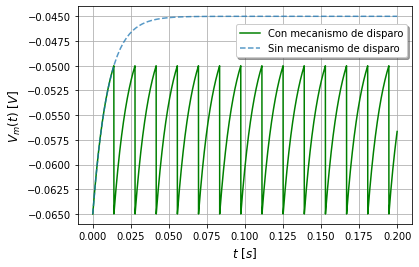

In [28]:
plt.plot(t_4,x_4, 'g')
plt.plot(t, vm_t, '--', alpha=0.75)
plt.legend(['Con mecanismo de disparo', 'Sin mecanismo de disparo'], 
           shadow=True, loc='upper right', bbox_to_anchor=(1, 0.94))

plt.grid()

plt.xlabel('$t\ [s]$', size='large')
plt.ylabel('$V_m(t)\ [V]$', size='large')

plt.savefig("informe/figuras/ej_f.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [29]:
f_trig

71.94244604317072

### G)

In [30]:
def f(x, t, p):
    #return p[0] * x + p[1] * np.cos(x*30) + p[2]
    return p[0] * x + p[1] * p[2](t) + p[3]

In [31]:
i_0 = 2.5E-9
def i_e(t):
    return i_0 * np.cos(t/0.030)

In [32]:
x = np.array([-0.065])
p = (-1/t_m, r_m/t_m, i_e, e_l/t_m)

In [33]:
a = 0
b = 0.25

In [34]:
t_4,x_4, f_trig = integrador_ode_condicionado(rk4, f, x, a, b, k, p, v_um)

In [35]:
t_4_0,x_4_0 = integrador_ode(rk4, f, x, a, b, k, p)

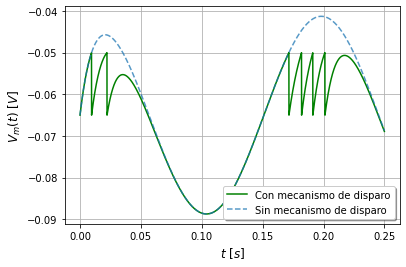

In [36]:
plt.plot(t_4,x_4, 'g')
plt.plot(t_4_0, x_4_0, '--', alpha=0.75)
#plt.plot(t, vm_t, 'b-.')
#plt.legend(['Aproximación numérica', 'Solución exacta'])
plt.legend(['Con mecanismo de disparo', 'Sin mecanismo de disparo'], 
           shadow=True, loc='lower right')

plt.grid()

plt.xlabel('$t\ [s]$', size='large')
plt.ylabel('$V_m(t)\ [V]$', size='large')

plt.savefig("informe/figuras/ej_g.pdf", format="pdf", bbox_inches="tight")

plt.show()

### H)

In [37]:
vm, el, rm, ie, u0, t, tm = syp.symbols('Vm(t) El Rm I U(0) t Tm')
syp.solve((u0 * syp.exp(-t/tm)) - vm +el +rm * ie, t)

[Tm*log(-U(0)/(El + I*Rm - Vm(t)))]

In [38]:
v0 = syp.symbols('Vm(0)')
u0 = v0 - el - rm * ie

In [39]:
syp.solve((u0 * syp.exp(-t/tm)) - vm +el +rm * ie, t)

[Tm*log((El + I*Rm - Vm(0))/(El + I*Rm - Vm(t)))]

In [40]:
u0, t, tm, vum, el, rm, ie = syp.symbols('U0 t Tm Vum El Rm I')

In [41]:
syp.solve((u0 * syp.exp(-t/tm)) - (vum) + el +rm * ie, t)

[Tm*log(-U0/(El + I*Rm - Vum))]

In [42]:
u0 = -10E6 * ie
#tm = 10E-3
el = -65E-3
rm = 10E+6

In [43]:
syp.solve((u0 * syp.exp(-t/tm)) - (-50E-3) + el +rm * ie, t)

[Tm*log(2000000000.0*I/(2000000000.0*I - 3.0))]

In [44]:
ie_cte_var = np.linspace(1E-9, 4E-9, 200)

In [45]:
frec_trig_ex = 1/(10E-3*np.log(2000000000.0*ie_cte_var/(2000000000.0*ie_cte_var - 3.0)))
inds = np.where(np.isnan(frec_trig_ex))
frec_trig_ex[inds] = 0

/tmp/ipykernel_21657/264577496.py:1: RuntimeWarning: invalid value encountered in log
  frec_trig_ex = 1/(10E-3*np.log(2000000000.0*ie_cte_var/(2000000000.0*ie_cte_var - 3.0)))


In [46]:
def f(x, t, p):
    return p[0] * x + p[1]

In [47]:
#i_e = 2E-9

In [48]:
x = np.array([-0.065])
#p = (-1/t_m, (e_l + r_m *i_e)/t_m)

In [49]:
a = 0
b = 0.2
k = int((b-a)//0.05E-3)
v_um = -0.05

In [50]:
frec_trig = []
for i_e in np.linspace(1E-9, 4E-9, 20): #[i * 1E-9 in ]:
    p = (-1/t_m, (e_l + r_m *i_e)/t_m)
    _, _, f_trig = integrador_ode_condicionado(rk4, f, x, a, b, k, p, v_um)
    frec_trig.append(f_trig)

/tmp/ipykernel_21657/159817538.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(ticks)


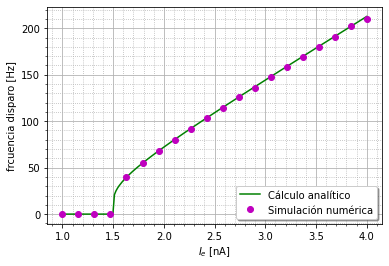

In [51]:
#import matplotlib.font_manager
#matplotlib.font_manager._rebuild()

#plt.rcParams["font.family"] = "Humor Sans"
#with plt.xkcd():
#plt.rcParams["font.family"] = "Humor Sans"

plt.plot(ie_cte_var, frec_trig_ex, 'g')
plt.plot(np.linspace(1E-9, 4E-9, 20), frec_trig, 'mo')
ticks = np.round(plt.gca().get_xticks()*1E9, decimals=1)
#ticks = plt.gca().get_xticks()*1E9
#print(ticks)
plt.gca().set_xticklabels(ticks)
plt.xlabel('$I_e$ [nA]')
plt.ylabel('frcuencia disparo [Hz]')
plt.grid()
plt.gca().minorticks_on()
plt.grid(b=True, which='minor', linestyle=':')

plt.legend(['Cálculo analítico', 'Simulación numérica'], 
           shadow=True, loc='lower right')

#plt.ylabel('Downloads of "humor sans" font')
#plt.title('title')
#    plt.set_cmap(plt.cool())

plt.savefig("informe/figuras/ej_h.pdf", format="pdf", bbox_inches="tight")

plt.show()

### I)

In [52]:
def f(x, t, p):
    #return p[0] * x + p[1] * np.cos(x*30) + p[2]
    return p[0] * x + p[1] * p[2](t) + p[3]

In [53]:
i_0 = 0.35E-9
def i_e(t):
    return i_0 * (np.cos(t/0.003) + np.sin(t/0.005) + np.cos(t/0.007) + np.sin(t/0.011) + np.cos(t/0.013)) **2

In [54]:
x = np.array([-0.065])
p = (-1/t_m, r_m/t_m, i_e, e_l/t_m)

In [55]:
a = 0
b = 0.2

In [56]:
t_4,x_4, f_trig = integrador_ode_condicionado(rk4, f, x, a, b, k, p, v_um)

In [57]:
t_4_0,x_4_0 = integrador_ode(rk4, f, x, a, b, k, p)

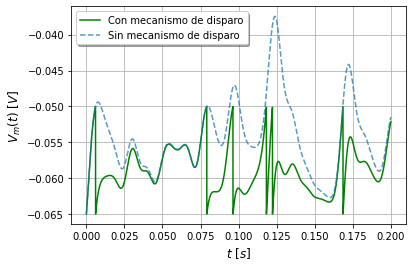

In [58]:
plt.plot(t_4,x_4, 'g')
plt.plot(t_4_0, x_4_0, '--', alpha=0.75)
#plt.plot(t, vm_t, 'b-.')
plt.legend(['Con mecanismo de disparo', 'Sin mecanismo de disparo'], 
           shadow=True, loc='upper left')

#plt.ylim(-0.067, -0.031)
#plt.xlim(-0.01, 0.21)
plt.grid()

plt.xlabel('$t\ [s]$', size='large')
plt.ylabel('$V_m(t)\ [V]$', size='large')

plt.savefig("informe/figuras/ej_i.pdf", format="pdf", bbox_inches="tight")

plt.show()